<a href="https://colab.research.google.com/github/Tanvi-Shukla08/Predictive-Analysis-for-Customer-Retention/blob/main/Predictive_Analysis_for_Customer_Retention_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Comparitive Study of Churn Prediction algorithms for Telecom operators.**


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Customer Churn Prediction**

In [ ]:
#Load the data set
from google.colab import files
uploaded=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
#Load the data into a dataframe
df=pd.read_csv('Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Show number of rows and columns in data frame
df.shape

(7043, 21)

In [ ]:
#Show name of all columns
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#Check for null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Show statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Find number of customers who are churning or no churning
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#Find the percentage of customer who are leaving
num_retained=df[df.Churn=='No'].shape[0]
num_churned=df[df.Churn=='Yes'].shape[0]
#Print the percentage of customer who left the company
print(num_churned/(num_churned+num_retained)*100,' % of customers left the company.')
#Print the percentage of customer who stay with the company
print(num_retained/(num_churned+num_retained)*100,' % of customers stay with the company.')

26.536987079369588  % of customers left the company.
73.4630129206304  % of customers stay with the company.


<Axes: xlabel='gender', ylabel='count'>

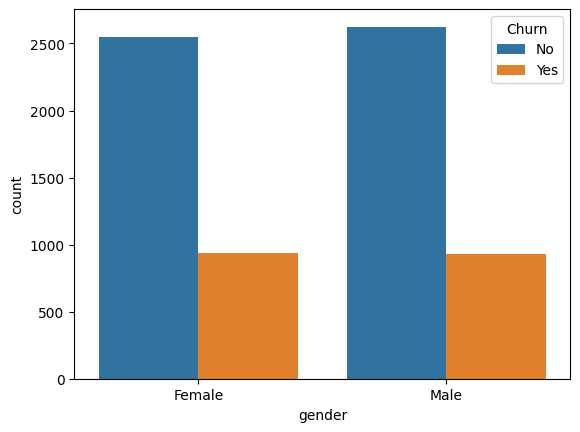

In [ ]:
#Visualize the  churn count for male and female
sns.countplot(x='gender',hue='Churn',data=df)

<Axes: xlabel='InternetService', ylabel='count'>

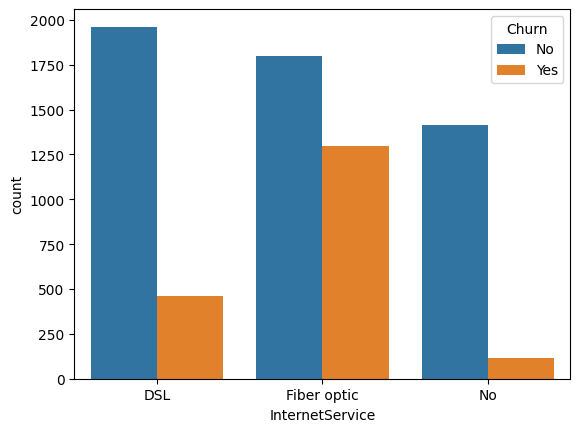

In [ ]:
#Visualize the churn count for internet service
sns.countplot(x='InternetService',hue='Churn',data=df)

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

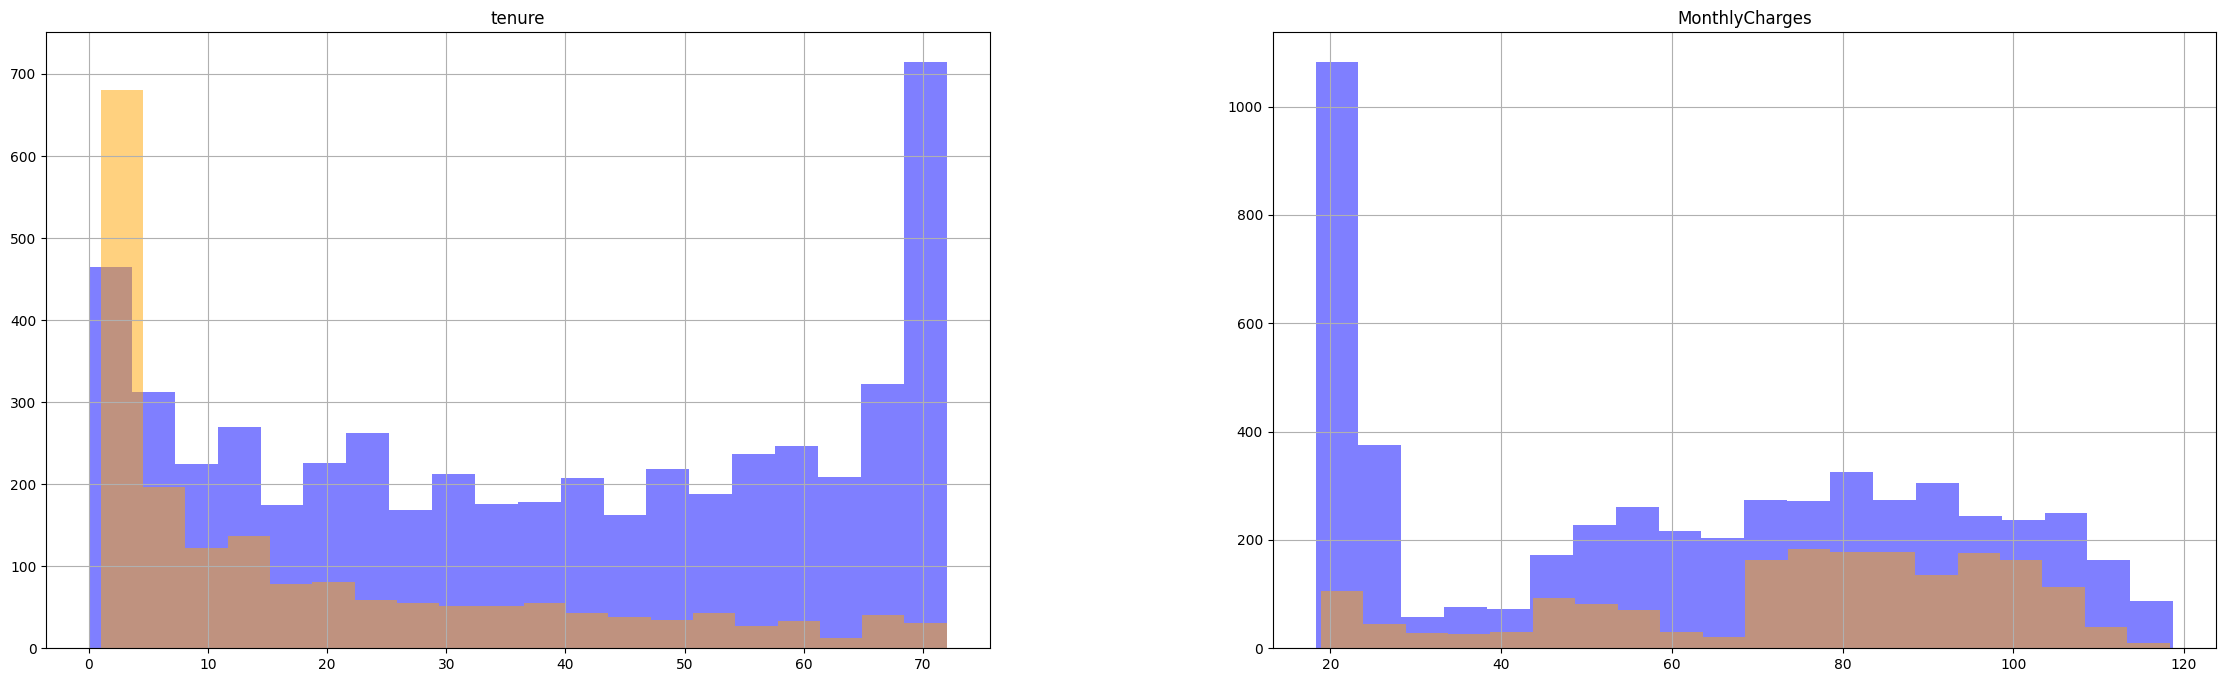

In [ ]:
#Visualizing the numerical attributes
numerical_features = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

In [ ]:
#Remove the unnecessary column customerID
cleaned_df=df.drop('customerID',axis=1)

In [ ]:
#Look at the rows and coolumns of cleaned data set
cleaned_df.shape

(7043, 20)

In [ ]:
#Convert all non numeric columns into numeric columns
for column in cleaned_df.columns:
  if cleaned_df[column].dtype==np.number:
    continue
  else:
    cleaned_df[column]=LabelEncoder().fit_transform(cleaned_df[column])

<ipython-input-15-9e0e742b65e3>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype==np.number:
<ipython-input-15-9e0e742b65e3>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype==np.number:
<ipython-input-15-9e0e742b65e3>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype==np.number:
<ipython-input-15-9e0e742b65e3>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype==np.number:
<ipython-input-15-9e0e742b65e3>:3: DeprecationWarning: Converting `np.inexact` or `np.floati

In [ ]:
#Printing the datatypes of columns after converting
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [ ]:
#Show first 5 rows of first dataset
cleaned_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
#Scale the cleaned data
X=cleaned_df.drop('Churn',axis=1)
y=cleaned_df['Churn']
X=StandardScaler().fit_transform(X)

In [ ]:
#Split the data into 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Logistic Regression**

In [ ]:
#Create the model
logisticModel=LogisticRegression()
#Train the model
logisticModel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Predicting the test data
logisticPredictions=logisticModel.predict(X_test)
#Print the predictions
print(logisticPredictions)

[1 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
logisticScore=accuracy_score(y_test,logisticPredictions)*100
print(logisticScore)

81.61816891412349


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomModel=RandomForestClassifier()
randomModel.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
randomPredictions=randomModel.predict(X_test)
print(randomPredictions)

[1 0 0 ... 0 0 1]


In [ ]:
randomScore=accuracy_score(y_test,randomPredictions)*100
print(randomScore)

79.77288857345636


**K-NN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnModel=KNeighborsClassifier()
knnModel.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knnPredictions=knnModel.predict(X_test)
print(knnPredictions)

[1 0 0 ... 0 0 1]


In [ ]:
knnScore=accuracy_score(y_test,knnPredictions)*100
print(knnScore)

77.50177430801988


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svmModel=SVC()
svmModel.fit(X_train,y_train)

SVC()

In [ ]:
svmPredictions=svmModel.predict(X_test)
print(svmPredictions)

[1 0 0 ... 0 0 0]


In [ ]:
svmScore=accuracy_score(y_test,svmPredictions)*100
print(svmScore)

80.69552874378992


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisionModel=DecisionTreeClassifier()
decisionModel.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
decisionPredictions=decisionModel.predict(X_test)
print(decisionPredictions)

[1 0 0 ... 0 0 1]


In [ ]:
decisionScore=accuracy_score(y_test,decisionPredictions)*100
print(decisionScore)

72.39176721078779


**ADA Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaModel=AdaBoostClassifier()
adaModel.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
adaPredictions=adaModel.predict(X_test)
print(adaPredictions)

[1 0 0 ... 0 0 1]


In [ ]:
adaScore=accuracy_score(y_test,adaPredictions)*100
print(adaScore)

80.55358410220013


**Comparision of all algorithms**

In [ ]:
algo_names=['K-NN','Decision Tree','Logistic Regression',]
accuracy_collection=np.array([knnScore,decisionScore,logisticScore])

<Axes: >

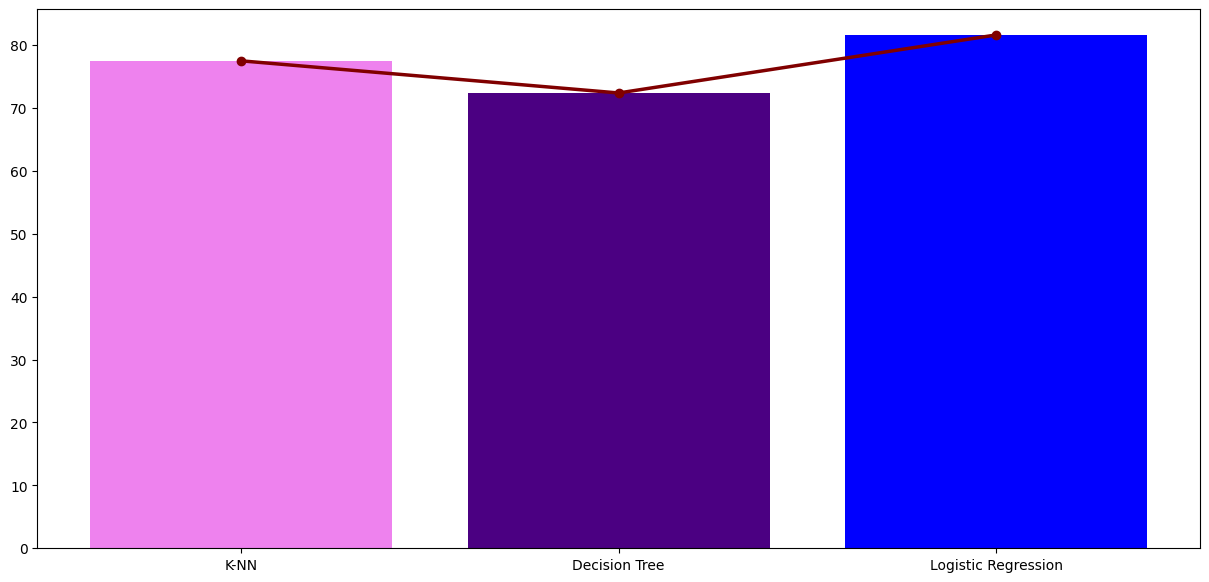

In [ ]:
data_dict = pd.DataFrame(dict(label=algo_names,data=accuracy_collection))
my_colors = ['violet', 'indigo', 'blue', 'green', 'yellow','orange']
plt.figure(figsize=(15, 7))
plt.bar(data_dict['label'],data_dict['data'],color=my_colors)
data_dict['data'].plot(kind='line', marker='o', color='maroon',linewidth=2.5)